In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
palette = sns.diverging_palette(220, 20)

import numpy as np

from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn import preprocessing

import pickle

import random

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
df = pd.read_pickle('../data/interim/train_clean.pickle')
df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_OSBranch_release_extracted
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0,53447.0,1.0,1.0,1,...,36144.0,0,0,0,0,0,0,10.0,0,rs4_release
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0,53447.0,1.0,1.0,1,...,57858.0,0,0,0,0,0,0,8.0,0,rs4_release
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0,53447.0,1.0,1.0,1,...,52682.0,0,0,0,0,0,0,3.0,0,rs4_release
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0,53447.0,1.0,1.0,1,...,20050.0,0,0,0,0,0,0,3.0,1,rs4_release
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0,53447.0,1.0,1.0,1,...,19844.0,0,0,0,0,0,0,1.0,1,rs4_release


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8921478 entries, 0 to 8921482
Data columns (total 72 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   ProductName                                        category
 1   EngineVersion                                      category
 2   AppVersion                                         category
 3   AvSigVersion                                       category
 4   RtpStateBitfield                                   category
 5   IsSxsPassiveMode                                   Int64   
 6   AVProductStatesIdentifier                          category
 7   AVProductsInstalled                                category
 8   AVProductsEnabled                                  category
 9   HasTpm                                             Int64   
 10  CountryIdentifier                                  category
 11  CityIdentifier                       

Extract features and reduce cardinality from categorical features (ID features omitted).

#### AvSigVersion

In [4]:
df['AvSigVersion'].isnull().sum()

0

In [5]:
av_sig_ver = pd.concat([df['AvSigVersion'].value_counts(),
                        df['AvSigVersion'].value_counts(normalize=True) * 100], 
                        axis=1)
av_sig_ver.columns=['Count', '%']
av_sig_ver.head(20)

,Count,%
1.273.1420.0,102317,1.146862
1.263.48.0,98024,1.098742
1.275.1140.0,97231,1.089853
1.275.727.0,92448,1.036241
1.273.371.0,86967,0.974805
1.273.1826.0,86013,0.964112
1.275.1244.0,78902,0.884405
1.251.42.0,76837,0.861259
1.275.1209.0,66393,0.744193
1.273.810.0,65895,0.738611


In [6]:
idx = df['AvSigVersion'][~df.AvSigVersion.str.startswith('1')].index
df['AvSigVersion'].loc[idx]

110258     0.0.0.0
152561     0.0.0.0
165482     0.0.0.0
475422     0.0.0.0
549779     0.0.0.0
703215     0.0.0.0
710963     0.0.0.0
734068     0.0.0.0
735046     0.0.0.0
876787     0.0.0.0
892801     0.0.0.0
1016150    0.0.0.0
1275308    0.0.0.0
1307121    0.0.0.0
1592098    0.0.0.0
1672030    0.0.0.0
1856404    0.0.0.0
1956722    0.0.0.0
1989763    0.0.0.0
2064206    0.0.0.0
2130333    0.0.0.0
2641951    0.0.0.0
2883656    0.0.0.0
3186161    0.0.0.0
3277045    0.0.0.0
3345950    0.0.0.0
3485546    0.0.0.0
3596984    0.0.0.0
4097861    0.0.0.0
4123323    0.0.0.0
4141773    0.0.0.0
4557176    0.0.0.0
4944332    0.0.0.0
5031887    0.0.0.0
5050150    0.0.0.0
5054364    0.0.0.0
5388655    0.0.0.0
5471692    0.0.0.0
5718933    0.0.0.0
5827377    0.0.0.0
5875826    0.0.0.0
6143595    0.0.0.0
6189122    0.0.0.0
6302952    0.0.0.0
6308809    0.0.0.0
6435549    0.0.0.0
6485019    0.0.0.0
6702847    0.0.0.0
6822125    0.0.0.0
6870799    0.0.0.0
6884481    0.0.0.0
6918765    0.0.0.0
7285638    0

In [7]:
df['AvSigVersion_extracted'] = [item[1] for item in df.AvSigVersion.str.split('.')]
df['AvSigVersion_extracted'] = df['AvSigVersion_extracted'].astype('category')
df[['AvSigVersion','AvSigVersion_extracted']]

,AvSigVersion,AvSigVersion_extracted
0,1.273.1735.0,273
1,1.263.48.0,263
2,1.273.1341.0,273
3,1.273.1527.0,273
4,1.273.1379.0,273
...,...,...
8921478,1.273.1555.0,273
8921479,1.233.4218.0,233
8921480,1.275.1242.0,275
8921481,1.269.1834.0,269


In [8]:
av_sig_ver = pd.concat([df['AvSigVersion_extracted'].value_counts(),
                        df['AvSigVersion_extracted'].value_counts(normalize=True) * 100], 
                        axis=1)
av_sig_ver.columns=['Count', '%']
av_sig_ver.head(10)

,Count,%
275,3901024,43.726208
273,3724333,41.745695
271,269369,3.019332
269,214502,2.404333
263,160659,1.800811
267,138899,1.556906
251,94182,1.055677
277,79719,0.893563
237,70628,0.791663
261,48790,0.546882


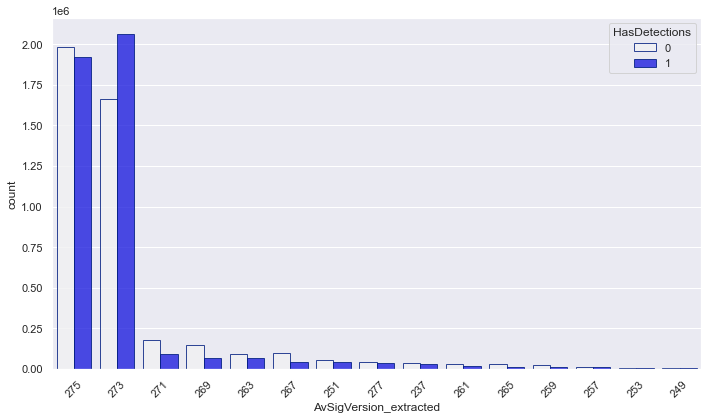

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AvSigVersion_extracted',
            hue='HasDetections',
            data=df,
            order=df['AvSigVersion_extracted'].value_counts().index[:15],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [10]:
df['AvSigVersion_extracted'].dtype

CategoricalDtype(categories=['0', '155', '167', '169', '177', '187', '189', '193', '195',
                  '197', '199', '2&#x17;3', '201', '203', '205', '207', '209',
                  '211', '213', '215', '217', '219', '221', '223', '225',
                  '227', '229', '231', '233', '235', '237', '239', '241',
                  '243', '245', '247', '249', '251', '253', '255', '257',
                  '259', '261', '263', '265', '267', '269', '271', '273',
                  '275', '277'],
, ordered=False)

In [11]:
df['AvSigVersion_extracted'] = df['AvSigVersion_extracted'].astype('category')
df['AvSigVersion_extracted'].cat.add_categories('Other', inplace=True)
df.loc[(df['AvSigVersion_extracted'] != '275') & (df['AvSigVersion_extracted'] != '273'), 
       'AvSigVersion_extracted'] = 'Other'
df['AvSigVersion_extracted'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'AvSigVersion_extracted':'AvSigVersion_encoded'}, inplace=True)
df['AvSigVersion_encoded'].value_counts(normalize=True)

275      0.437262
273      0.417457
Other    0.145281
Name: AvSigVersion_encoded, dtype: float64

In [12]:
to_drop = []
to_drop.append('AvSigVersion')

#### Census_OSVersion

In [13]:
df['Census_OSVersion'].isnull().sum()

0

In [14]:
census_os_ver = pd.concat([df['Census_OSVersion'].value_counts(),
                        df['Census_OSVersion'].value_counts(normalize=True) * 100], 
                        axis=1)
census_os_ver.columns=['Count', '%']
census_os_ver.head(20)

,Count,%
10.0.17134.228,1413627,15.845211
10.0.17134.165,899711,10.084775
10.0.16299.431,546546,6.126182
10.0.17134.285,470278,5.271301
10.0.16299.547,346853,3.887842
10.0.17134.112,346410,3.882877
10.0.16299.371,325267,3.645887
10.0.17134.191,228254,2.558477
10.0.14393.2189,223774,2.508262
10.0.16299.611,216776,2.429822


In [15]:
sum(~df.Census_OSVersion.str.startswith('10.0.'))

20

In [16]:
idx = df['Census_OSVersion'][~df.Census_OSVersion.str.startswith('10')].index
df['Census_OSVersion'].loc[idx]

539238     6.3.9600.19102
570167     6.1.7601.24241
667694     6.2.9200.17617
1370982    6.3.9600.19069
1485064    6.3.9600.19069
1549235    6.2.9200.17617
2927703    6.2.9200.17581
3183570    6.3.9600.18687
3336222    6.3.9600.19102
4035016    6.1.7601.24149
4813273    6.3.9600.19102
5593621    6.3.9600.19069
5889449    6.3.9600.18778
6422191    6.1.7601.24241
6758081    6.1.7601.24214
6895980    6.3.9600.18756
7611545    6.1.7601.23418
8266291    6.3.9600.19069
8370072    6.3.9600.19102
8743609    6.2.9200.21703
Name: Census_OSVersion, dtype: category
Categories (469, object): ['10.0.10240.16384', '10.0.10240.16387', '10.0.10240.16389', '10.0.10240.16391', ..., '6.3.9600.18756', '6.3.9600.18778', '6.3.9600.19069', '6.3.9600.19102']

In [17]:
len(idx)

20

OS Version 6 is rare, just 20 cases. All the others are ver 10.0. 
Of these we can extract the 5-digit build code after "10.0.". 

In [18]:
df['Census_OSVersion_extracted'] = [item[2] for item in df.Census_OSVersion.str.split('.')]
df['Census_OSVersion_extracted'] = df['Census_OSVersion_extracted'].astype('category')
df[['Census_OSVersion', 'Census_OSVersion_extracted']]

,Census_OSVersion,Census_OSVersion_extracted
0,10.0.17134.165,17134
1,10.0.17134.1,17134
2,10.0.17134.165,17134
3,10.0.17134.228,17134
4,10.0.17134.191,17134
...,...,...
8921478,10.0.16299.431,16299
8921479,10.0.10586.679,10586
8921480,10.0.16299.371,16299
8921481,10.0.15063.483,15063


This is probably the build number, which was already included in the features. I will check on this later when I analyze the OS features.

In [19]:
to_drop.append('Census_OSVersion')

#### AppVersion

In [20]:
df['AppVersion'].isnull().sum()

0

In [21]:
app_ver = pd.concat([df['AppVersion'].value_counts(),
                        df['AppVersion'].value_counts(normalize=True) * 100], 
                        axis=1)
app_ver.columns=['Count', '%']
app_ver.head(20)

,Count,%
4.18.1807.18075,5139221,57.605040
4.18.1806.18062,850929,9.537982
4.12.16299.15,359871,4.033760
4.10.209.0,272454,3.053911
4.13.17134.1,257270,2.883715
4.16.17656.18052,235032,2.634451
4.13.17134.228,226501,2.538828
4.8.10240.17443,205479,2.303195
4.9.10586.1106,203525,2.281292
4.14.17639.18041,194699,2.182363


In [22]:
idx = df['AppVersion'][~df.AppVersion.str.startswith('4')].index
df['AppVersion'].loc[idx]

Series([], Name: AppVersion, dtype: category
Categories (110, object): ['4.10.14393.0', '4.10.14393.1066', '4.10.14393.1198', '4.10.14393.1532', ..., '4.9.10586.962', '4.9.10586.965', '4.9.218.0', '4.9.219.0'])

The AppVersion is always 4, I'll extract code after "4.".

In [23]:
df['AppVersion_extracted'] = [item[1] for item in df.AppVersion.str.split('.')]
df['AppVersion_extracted'] = df['AppVersion_extracted'].astype('category')
df[['AppVersion','AppVersion_extracted']]

,AppVersion,AppVersion_extracted
0,4.18.1807.18075,18
1,4.13.17134.1,13
2,4.18.1807.18075,18
3,4.18.1807.18075,18
4,4.18.1807.18075,18
...,...,...
8921478,4.18.1807.18075,18
8921479,4.9.10586.672,9
8921480,4.18.1807.18075,18
8921481,4.16.17656.18052,16


In [24]:
app_ver = pd.concat([df['AppVersion_extracted'].value_counts(),
                     df['AppVersion_extracted'].value_counts(normalize=True) * 100], 
                        axis=1)
app_ver.columns=['Count', '%']
app_ver.head(30)

,Count,%
18,6004752,67.306695
12,553556,6.204757
13,518592,5.812848
10,457718,5.130518
9,417039,4.674551
8,275738,3.090721
14,248765,2.788383
16,235060,2.634765
11,205271,2.300863
5,2261,0.025343


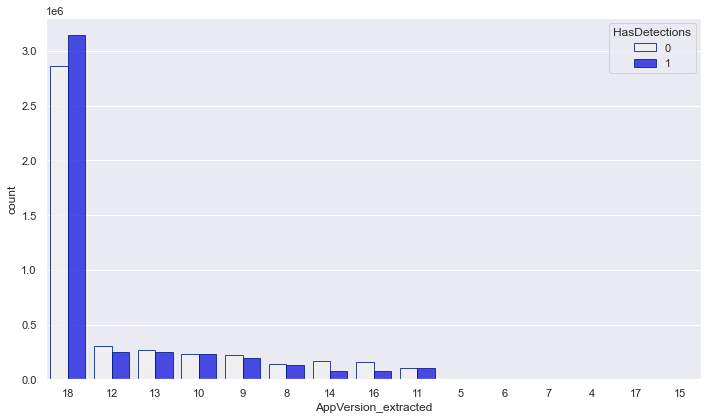

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AppVersion_extracted',
            hue='HasDetections',
            data=df,
            order=df['AppVersion_extracted'].value_counts().index[:15],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.tight_layout()

In [26]:
df['AppVersion_extracted'].dtype

CategoricalDtype(categories=['10', '11', '12', '13', '14', '15', '16', '17', '18', '4',
                  '5', '6', '7', '8', '9'],
, ordered=False)

In [27]:
df['AppVersion_extracted'].cat.add_categories('Other', inplace=True)
df.loc[(df['AppVersion_extracted'] != '18') &
       (df['AppVersion_extracted'] != '12') &
       (df['AppVersion_extracted'] != '13') &
       (df['AppVersion_extracted'] != '10') &
       (df['AppVersion_extracted'] != '9') &
       (df['AppVersion_extracted'] != '8') &
       (df['AppVersion_extracted'] != '14') &
       (df['AppVersion_extracted'] != '16') &
       (df['AppVersion_extracted'] != '11'), 
       'AppVersion_extracted'] = 'Other'
df['AppVersion_extracted'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'AppVersion_extracted':'AppVersion_encoded'}, inplace=True)
df['AppVersion_encoded'].value_counts(normalize=True)

18       0.673067
12       0.062048
13       0.058128
10       0.051305
9        0.046746
8        0.030907
14       0.027884
16       0.026348
11       0.023009
Other    0.000559
Name: AppVersion_encoded, dtype: float64

In [28]:
to_drop.append('AppVersion')

#### EngineVersion

In [29]:
df['EngineVersion'].isnull().sum()

0

In [30]:
eng_ver = pd.concat([df['EngineVersion'].value_counts(),
                     df['EngineVersion'].value_counts(normalize=True) * 100], 
                     axis=1)
eng_ver.columns=['Count', '%']
eng_ver.head(20)

,Count,%
1.1.15200.1,3845063,43.098946
1.1.15100.1,3675914,41.202971
1.1.15000.2,265218,2.972803
1.1.14901.4,212408,2.380861
1.1.14600.4,160585,1.799982
1.1.14800.3,136476,1.529747
1.1.15300.6,120295,1.348375
1.1.14104.0,93926,1.052808
1.1.13504.0,70645,0.791853
1.1.15300.5,68716,0.770231


In [31]:
idx = df['EngineVersion'][~df.EngineVersion.str.startswith('1.1.')].index
df['EngineVersion'].loc[idx]

Series([], Name: EngineVersion, dtype: category
Categories (70, object): ['1.1.10302.0', '1.1.10401.0', '1.1.10701.0', '1.1.11104.0', ..., '1.1.15200.1', '1.1.15300.5', '1.1.15300.6', '1.1.9700.0'])

Let's extract the 5-digit code after "1.1.".

In [32]:
df['EngineVersion_extracted'] = [item[2] for item in df.EngineVersion.str.split('.')]
df['EngineVersion_extracted'] = df['EngineVersion_extracted'].astype('category')
df[['EngineVersion','EngineVersion_extracted']]

,EngineVersion,EngineVersion_extracted
0,1.1.15100.1,15100
1,1.1.14600.4,14600
2,1.1.15100.1,15100
3,1.1.15100.1,15100
4,1.1.15100.1,15100
...,...,...
8921478,1.1.15100.1,15100
8921479,1.1.13303.0,13303
8921480,1.1.15200.1,15200
8921481,1.1.14901.4,14901


In [33]:
eng_ver = pd.concat([df['EngineVersion_extracted'].value_counts(),
                     df['EngineVersion_extracted'].value_counts(normalize=True) * 100], 
                        axis=1)
eng_ver.columns=['Count', '%']
eng_ver.head(10)

,Count,%
15200,3845063,43.098946
15100,3675914,41.202971
15000,267690,3.000512
14901,214039,2.399143
15300,189011,2.118606
14600,160585,1.799982
14800,137447,1.540630
14104,93926,1.052808
13504,70645,0.791853
14700,49210,0.551590


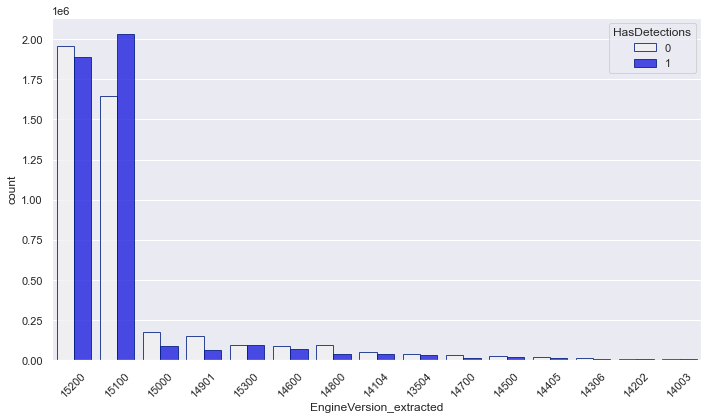

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EngineVersion_extracted',
            hue='HasDetections',
            data=df,
            order=df['EngineVersion_extracted'].value_counts().index[:15],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [35]:
df['EngineVersion_extracted'].dtype

CategoricalDtype(categories=['10302', '10401', '10701', '11104', '11202', '11400',
                  '11502', '11602', '11701', '11804', '11903', '12002',
                  '12101', '12205', '12300', '12400', '12505', '12603',
                  '12706', '12802', '12804', '12805', '12902', '13000',
                  '13102', '13103', '13202', '13301', '13303', '13406',
                  '13407', '13503', '13504', '13601', '13701', '13704',
                  '13802', '13803', '13804', '13902', '13903', '14001',
                  '14002', '14003', '14102', '14103', '14104', '14201',
                  '14202', '14303', '14305', '14306', '14405', '14500',
                  '14600', '14700', '14800', '14901', '15000', '15100',
                  '15200', '15300', '9700'],
, ordered=False)

In [36]:
df['EngineVersion_extracted'].cat.add_categories('Other', inplace=True)
df.loc[(df['EngineVersion_extracted'] != '15200') &
       (df['EngineVersion_extracted'] != '15100') &
       (df['EngineVersion_extracted'] != '15000') &
       (df['EngineVersion_extracted'] != '14901') &
       (df['EngineVersion_extracted'] != '15300') &
       (df['EngineVersion_extracted'] != '14600') &
       (df['EngineVersion_extracted'] != '14800') &
       (df['EngineVersion_extracted'] != '14104') &
       (df['EngineVersion_extracted'] != '13504'), 
       'EngineVersion_extracted'] = 'Other'
df['EngineVersion_extracted'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'EngineVersion_extracted':'EngineVersion_encoded'}, inplace=True)
df['EngineVersion_encoded'].value_counts(normalize=True)

15200    0.430989
15100    0.412030
15000    0.030005
Other    0.029945
14901    0.023991
15300    0.021186
14600    0.018000
14800    0.015406
14104    0.010528
13504    0.007919
Name: EngineVersion_encoded, dtype: float64

In [37]:
to_drop.append('EngineVersion')

#### OsVer

In [38]:
df['OsVer'].isnull().sum()

0

In [39]:
os_ver = pd.concat([df['OsVer'].value_counts(),
                     df['OsVer'].value_counts(normalize=True) * 100], 
                     axis=1)
os_ver.columns=['Count', '%']
os_ver.head(20)

,Count,%
10.0.0.0,8632541,96.761333
6.3.0.0,194446,2.179527
6.1.1.0,93268,1.045432
6.1.0.0,582,0.006524
10.0.3.0,225,0.002522
10.0.1.0,141,0.001580
10.0.2.0,30,0.000336
6.1.3.0,30,0.000336
6.3.3.0,24,0.000269
10.0.32.72,23,0.000258


In [40]:
pd.crosstab(df.OsVer, df.HasDetections).head(10)

HasDetections,0,1
OsVer,,
10.0.0.0,4318188,4314353
10.0.0.1,3,2
10.0.0.112,6,4
10.0.0.2,0,1
10.0.0.22,1,0
10.0.0.3,2,0
10.0.0.80,0,1
10.0.0.96,0,1
10.0.1.0,62,79


In [41]:
versions = ['6.1', '6.3', '10.0']
for ver in versions:
    df.loc[df.OsVer.str.startswith(ver), 'OsVer_encoded'] = ver
    
df['OsVer_encoded'] = df['OsVer_encoded'].astype('category')
df['OsVer_encoded'].value_counts()

10.0    8633082
6.3      194507
6.1       93889
Name: OsVer_encoded, dtype: int64

In [42]:
to_drop.append('OsVer')

#### Census_ChassisTypeName

In [43]:
df['Census_ChassisTypeName'].isnull().sum()

623

In [44]:
nans = df['Census_ChassisTypeName'].isnull()

In [45]:
census_chassis = pd.concat([df['Census_ChassisTypeName'].value_counts(), 
                            df['Census_ChassisTypeName'].value_counts(normalize=True) * 100], 
                            axis=1)
census_chassis.columns=['Count', '%']
census_chassis.head(10)

,Count,%
Notebook,5248809,58.837511
Desktop,1872125,20.985937
Laptop,685581,7.685149
Portable,360903,4.045610
AllinOne,204295,2.290083
MiniTower,85127,0.954247
Convertible,84472,0.946905
Other,75780,0.849470
UNKNOWN,67212,0.753426
Detachable,51466,0.576918


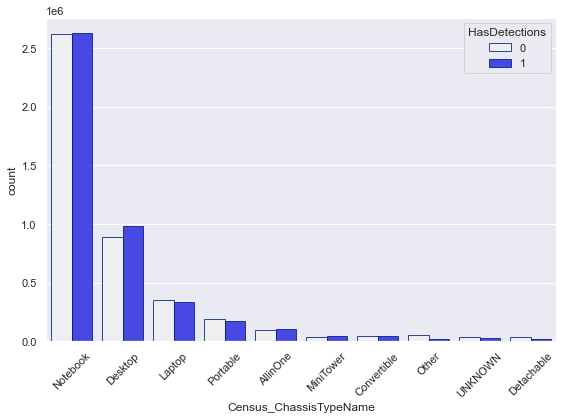

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Census_ChassisTypeName',
            hue='HasDetections',
            data=df,
            order=df['Census_ChassisTypeName'].value_counts().index[:10],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [47]:
df['Census_ChassisTypeName'].dtype

CategoricalDtype(categories=['0', '112', '127', '25', '28', '30', '31', '32', '35', '36',
                  '39', '44', '45', '49', '76', '81', '82', '88', 'AllinOne',
                  'Blade', 'BladeEnclosure', 'BusExpansionChassis',
                  'CompactPCI', 'Convertible', 'Desktop', 'Detachable',
                  'DockingStation', 'EmbeddedPC', 'ExpansionChassis',
                  'HandHeld', 'IoTGateway', 'Laptop', 'LowProfileDesktop',
                  'LunchBox', 'MainServerChassis', 'MiniPC', 'MiniTower',
                  'MultisystemChassis', 'Notebook', 'Other', 'PizzaBox',
                  'Portable', 'RackMountChassis', 'SealedCasePC',
                  'SpaceSaving', 'StickPC', 'SubChassis', 'SubNotebook',
                  'Tablet', 'Tower', 'UNKNOWN', 'Unknown'],
, ordered=False)

In [48]:
df.loc[(df['Census_ChassisTypeName'] != 'Notebook') &
       (df['Census_ChassisTypeName'] != 'Desktop') &
       (df['Census_ChassisTypeName'] != 'Laptop') &
       (df['Census_ChassisTypeName'] != 'Portable') &
       (df['Census_ChassisTypeName'] != 'AllinOne') &
       (df['Census_ChassisTypeName'] != 'MiniTower') &
       (df['Census_ChassisTypeName'] != 'Convertible'), 
       'Census_ChassisTypeName'] = 'Other'
df['Census_ChassisTypeName'].cat.remove_unused_categories(inplace=True)
df.loc[nans, 'Census_ChassisTypeName'] = np.nan
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].astype('category')
df.rename(columns={'Census_ChassisTypeName':'Census_ChassisTypeName_encoded'}, inplace=True)
df['Census_ChassisTypeName_encoded'].value_counts(normalize=True)

Notebook       0.588375
Desktop        0.209859
Laptop         0.076851
Other          0.042546
Portable       0.040456
AllinOne       0.022901
MiniTower      0.009542
Convertible    0.009469
Name: Census_ChassisTypeName_encoded, dtype: float64

In [49]:
df['Census_ChassisTypeName_encoded'].isnull().sum()

623

#### Census_OSEdition

In [50]:
df['Census_OSEdition'].isnull().sum()

0

In [51]:
census_os_edition = pd.concat([df['Census_OSEdition'].value_counts(),
                               df['Census_OSEdition'].value_counts(normalize=True) * 100], 
                               axis=1)
census_os_edition.columns=['Count', '%']
census_os_edition.head(100)

,Count,%
Core,3469988,38.894766
Professional,3130565,35.090206
CoreSingleLanguage,1945460,21.806476
CoreCountrySpecific,166100,1.861799
ProfessionalEducation,56698,0.635522
Education,40704,0.456247
Enterprise,35603,0.399071
ProfessionalN,28341,0.317672
EnterpriseS,20020,0.224402
ServerStandard,10128,0.113524


In [52]:
df.loc[df.Census_OSEdition == 'professional', 'Census_OSEdition'] = 'Professional'
df.Census_OSEdition.cat.remove_categories('professional', inplace=True)

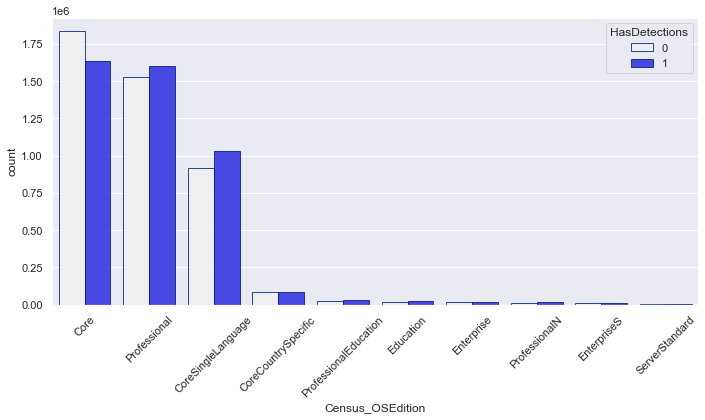

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Census_OSEdition',
            hue='HasDetections',
            data=df,
            order=df['Census_OSEdition'].value_counts().index[:10],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [54]:
df['Census_OSEdition'].dtype

CategoricalDtype(categories=['Cloud', 'CloudN', 'Core', 'CoreCountrySpecific', 'CoreN',
                  'CoreSingleLanguage', 'Education', 'EducationN',
                  'Enterprise', 'Enterprise 2015 LTSB', 'EnterpriseN',
                  'EnterpriseS', 'EnterpriseSN', 'Home', 'HomePremium', 'Pro',
                  'Professional', 'ProfessionalCountrySpecific',
                  'ProfessionalEducation', 'ProfessionalEducationN',
                  'ProfessionalN', 'ProfessionalSingleLanguage',
                  'ProfessionalWorkstation', 'ProfessionalWorkstationN',
                  'ServerDatacenter', 'ServerDatacenterACor',
                  'ServerDatacenterEval', 'ServerRdsh', 'ServerSolution',
                  'ServerStandard', 'ServerStandardEval', 'Ultimate'],
, ordered=False)

In [55]:
df['Census_OSEdition'].cat.add_categories('Other', inplace=True)
other_os_edition = ~df['Census_OSEdition'].isin(['Core',
                                                'Professional',
                                                'CoreSingleLanguage'])
df.loc[other_os_edition, 'Census_OSEdition'] = 'Other'
df['Census_OSEdition'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'Census_OSEdition':'Census_OSEdition_encoded'}, inplace=True)
df['Census_OSEdition_encoded'].value_counts(normalize=True)


Core                  0.388948
Professional          0.350902
CoreSingleLanguage    0.218065
Other                 0.042085
Name: Census_OSEdition_encoded, dtype: float64

#### Census_OSSkuName

In [56]:
df['Census_OSSkuName'].isnull().sum()

0

In [57]:
census_os_sku = pd.concat([df['Census_OSSkuName'].value_counts(),
                           df['Census_OSSkuName'].value_counts(normalize=True) * 100],
                           axis=1)
census_os_sku.columns=['Count', '%']
census_os_sku.head(100)

,Count,%
CORE,3469866,38.893399
PROFESSIONAL,3187912,35.733003
CORE_SINGLELANGUAGE,1945132,21.802800
CORE_COUNTRYSPECIFIC,165886,1.859400
EDUCATION,40827,0.457626
ENTERPRISE,35602,0.399059
PROFESSIONAL_N,28522,0.319700
ENTERPRISE_S,20022,0.224425
STANDARD_SERVER,10128,0.113524
CLOUD,6167,0.069125


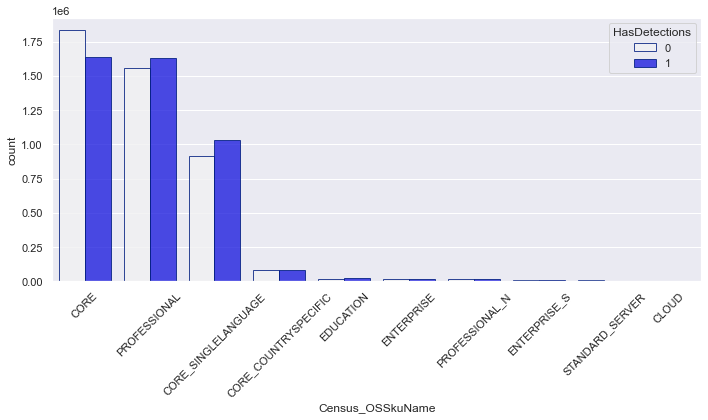

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Census_OSSkuName',
            hue='HasDetections',
            data=df,
            order=df['Census_OSSkuName'].value_counts().index[:10],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [59]:
df['Census_OSSkuName'].dtype

CategoricalDtype(categories=['CLOUD', 'CLOUDN', 'CORE', 'CORE_COUNTRYSPECIFIC', 'CORE_N',
                  'CORE_SINGLELANGUAGE', 'DATACENTER_EVALUATION_SERVER',
                  'DATACENTER_SERVER', 'EDUCATION', 'EDUCATION_N',
                  'ENTERPRISE', 'ENTERPRISEG', 'ENTERPRISE_N', 'ENTERPRISE_S',
                  'ENTERPRISE_S_N', 'PROFESSIONAL', 'PROFESSIONAL_N',
                  'PRO_CHINA', 'PRO_FOR_EDUCATION', 'PRO_SINGLE_LANGUAGE',
                  'PRO_WORKSTATION', 'PRO_WORKSTATION_N', 'SB_SOLUTION_SERVER',
                  'SERVERRDSH', 'STANDARD_EVALUATION_SERVER',
                  'STANDARD_SERVER', 'STARTER', 'ULTIMATE', 'UNDEFINED',
                  'UNLICENSED'],
, ordered=False)

In [60]:
df['Census_OSSkuName'].cat.add_categories('Other', inplace=True)
df.loc[(df['Census_OSSkuName'] != 'CORE') & 
       (df['Census_OSSkuName'] != 'PROFESSIONAL') &
       (df['Census_OSSkuName'] != 'CORE_SINGLELANGUAGE') &
       (df['Census_OSSkuName'] != 'CORE_COUNTRYSPECIFIC') &
       (df['Census_OSSkuName'] != 'EDUCATION') &
       (df['Census_OSSkuName'] != 'ENTERPRISE') &
       (df['Census_OSSkuName'] != 'PROFESSIONAL_N') &
       (df['Census_OSSkuName'] != 'PROFESSIONAL_S'),
             'Census_OSSkuName'] = 'Other'
df['Census_OSSkuName'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'Census_OSSkuName':'Census_OSSkuName_encoded'}, inplace=True)
df['Census_OSSkuName_encoded'].value_counts(normalize=True)

CORE                    0.388934
PROFESSIONAL            0.357330
CORE_SINGLELANGUAGE     0.218028
CORE_COUNTRYSPECIFIC    0.018594
Other                   0.005350
EDUCATION               0.004576
ENTERPRISE              0.003991
PROFESSIONAL_N          0.003197
Name: Census_OSSkuName_encoded, dtype: float64

#### SmartScreen

In [61]:
df['SmartScreen'].isnull().sum()

3177010

In [63]:
nans = df['SmartScreen'].isnull()

In [64]:
smart_screen = pd.concat([df['SmartScreen'].value_counts(), 
                            df['SmartScreen'].value_counts(normalize=True) * 100], 
                            axis=1)
smart_screen.columns=['Count', '%']
smart_screen.head(30)

,Count,%
RequireAdmin,4316180,75.136288
ExistsNotSet,1046182,18.211991
Off,186553,3.247524
Warn,135483,2.358495
Prompt,34533,0.601152
Block,22533,0.392256
off,1350,0.023501
On,731,0.012725
&#x02;,416,0.007242
&#x01;,335,0.005832


In [65]:
df.loc[df.SmartScreen == 'requireAdmin', 'SmartScreen'] = 'RequireAdmin'
df.loc[df.SmartScreen == 'requireadmin', 'SmartScreen'] = 'RequireAdmin'
df.loc[df.SmartScreen == 'off', 'SmartScreen'] = 'Off'
df.loc[df.SmartScreen == 'OFF', 'SmartScreen'] = 'Off'
df.loc[df.SmartScreen == 'on', 'SmartScreen'] = 'On'
df.loc[df.SmartScreen == 'warn', 'SmartScreen'] = 'Warn'
df.loc[df.SmartScreen == 'Promt', 'SmartScreen'] = 'Prompt'
df.loc[df.SmartScreen == 'prompt', 'SmartScreen'] = 'Prompt'
df['SmartScreen'].cat.remove_unused_categories(inplace=True)
df.SmartScreen.value_counts() 

RequireAdmin    4316191
ExistsNotSet    1046182
Off              187907
Warn             135484
Prompt            34536
Block             22533
On                  878
&#x02;              416
&#x01;              335
0                     3
&#x03;                1
00000000              1
Enabled               1
Name: SmartScreen, dtype: int64

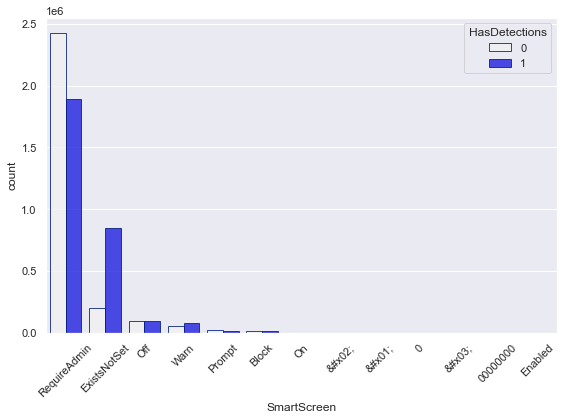

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SmartScreen',
            hue='HasDetections',
            data=df,
            order=df['SmartScreen'].value_counts().index,
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [67]:
df['SmartScreen'].dtype

CategoricalDtype(categories=['&#x01;', '&#x02;', '&#x03;', '0', '00000000', 'Block',
                  'Enabled', 'ExistsNotSet', 'Off', 'On', 'Prompt',
                  'RequireAdmin', 'Warn'],
, ordered=False)

In [68]:
df['SmartScreen'].cat.add_categories('Other', inplace=True)
df.loc[(df['SmartScreen'] == '&#x02;') | 
       (df['SmartScreen'] == '&#x01;') |
       (df['SmartScreen'] == '&#x03;') |
       (df['SmartScreen'] == '0') |
       (df['SmartScreen'] == 'Enabled') |
       (df['SmartScreen'] == '00000000'),
       'SmartScreen'] = 'Other'
df['SmartScreen'].cat.remove_unused_categories(inplace=True)
df.loc[nans, 'SmartScreen'] = np.nan
df['SmartScreen'] = df['SmartScreen'].astype('category')
df.rename(columns={'SmartScreen':'SmartScreen_encoded'}, inplace=True)
df['SmartScreen_encoded'].value_counts(normalize=True)

RequireAdmin    0.751365
ExistsNotSet    0.182120
Off             0.032711
Warn            0.023585
Prompt          0.006012
Block           0.003923
On              0.000153
Other           0.000132
Name: SmartScreen_encoded, dtype: float64

In [69]:
df['SmartScreen_encoded'].isnull().sum()

3177010

#### Census_MDC2FormFactor

In [70]:
df['Census_MDC2FormFactor'].isnull().sum()

0

In [71]:
census_MDC2 = pd.concat([df['Census_MDC2FormFactor'].value_counts(), 
                            df['Census_MDC2FormFactor'].value_counts(normalize=True) * 100], 
                            axis=1)
census_MDC2.columns=['Count', '%']
census_MDC2.head(30)

,Count,%
Notebook,5723314,64.152083
Desktop,1951086,21.869538
Convertible,405378,4.543844
Detachable,298233,3.342865
AllInOne,292077,3.273863
PCOther,139955,1.568742
LargeTablet,67121,0.752353
SmallTablet,31393,0.351881
SmallServer,8630,0.096733
MediumServer,3385,0.037942


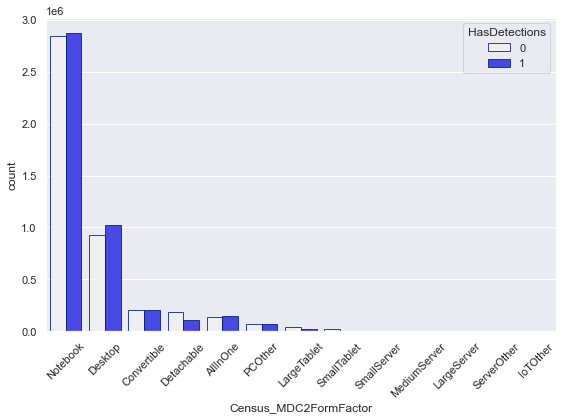

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Census_MDC2FormFactor',
            hue='HasDetections',
            data=df,
            order=df['Census_MDC2FormFactor'].value_counts().index,
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [73]:
df['Census_MDC2FormFactor'].dtype

CategoricalDtype(categories=['AllInOne', 'Convertible', 'Desktop', 'Detachable',
                  'IoTOther', 'LargeServer', 'LargeTablet', 'MediumServer',
                  'Notebook', 'PCOther', 'ServerOther', 'SmallServer',
                  'SmallTablet'],
, ordered=False)

In [74]:
df['Census_MDC2FormFactor'].cat.add_categories('Other', inplace=True)
df.loc[(df['Census_MDC2FormFactor'] == 'SmallServer') | 
       (df['Census_MDC2FormFactor'] == 'MediumServer') |
       (df['Census_MDC2FormFactor'] == 'LargeServer') |
       (df['Census_MDC2FormFactor'] == 'ServerOther') |
       (df['Census_MDC2FormFactor'] == 'IoTOther'), 
       'Census_MDC2FormFactor'] = 'Other'
df['Census_MDC2FormFactor'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'Census_MDC2FormFactor':'Census_MDC2FormFactor_encoded'}, inplace=True)
df['Census_MDC2FormFactor_encoded'].value_counts(normalize=True)

Notebook       0.641521
Desktop        0.218695
Convertible    0.045438
Detachable     0.033429
AllInOne       0.032739
PCOther        0.015687
LargeTablet    0.007524
SmallTablet    0.003519
Other          0.001448
Name: Census_MDC2FormFactor_encoded, dtype: float64

**UacLuaenable**

In [75]:
uac_luaenable = pd.concat([df['UacLuaenable'].value_counts(), 
                           df['UacLuaenable'].value_counts(normalize=True)*100],
                           axis=1)
uac_luaenable.columns=['Count', '%']
uac_luaenable.head(15)

,Count,%
1.0,8856512,99.392546
0.0,53851,0.604345
48.0,206,0.002312
2.0,30,0.000337
49.0,17,0.000191
6357062.0,13,0.000146
3.0,6,0.000067
5.0,2,0.000022
16777216.0,1,0.000011
255.0,1,0.000011


In [76]:
df['UacLuaenable'].dtype

CategoricalDtype(categories=['0.0', '1.0', '16777216.0', '2.0', '255.0', '3.0', '48.0',
                  '49.0', '5.0', '6357062.0', '7798884.0'],
, ordered=False)

In [77]:
df['UacLuaenable'] = df['UacLuaenable'][df['UacLuaenable'].notnull()].astype('str')
df['UacLuaenable'].unique()

array(['1.0', '0.0', nan, '48.0', '3.0', '2.0', '6357062.0', '49.0',
       '16777216.0', '5.0', '255.0', '7798884.0'], dtype=object)

In [78]:
df['UacLuaenable'] = df['UacLuaenable'].astype('category')
df['UacLuaenable'].cat.add_categories('Other', inplace=True)
df.loc[df['UacLuaenable'] != '1.0', 'UacLuaenable'] = 'Other'
df['UacLuaenable'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'UacLuaenable':'UacLuaenable_encoded'}, inplace=True)
df['UacLuaenable_encoded'].value_counts(normalize=True)

1.0      0.992718
Other    0.007282
Name: UacLuaenable_encoded, dtype: float64

Let's encode the remaining features:

**OsBuild**

In [80]:
df['OsBuild'].isnull().sum()

0

In [81]:
os_build = pd.concat([df['OsBuild'].value_counts(), 
                      df['OsBuild'].value_counts(normalize=True)*100], 
                      axis=1)
os_build.columns=['Count', '%']
os_build.head(10)

,Count,%
17134,3915519,43.888681
16299,2503681,28.063523
15063,780270,8.745972
14393,730818,8.191670
10586,411606,4.613653
10240,270191,3.028545
9600,194507,2.180210
7601,93306,1.045858
17692,3184,0.035689
17738,2478,0.027776


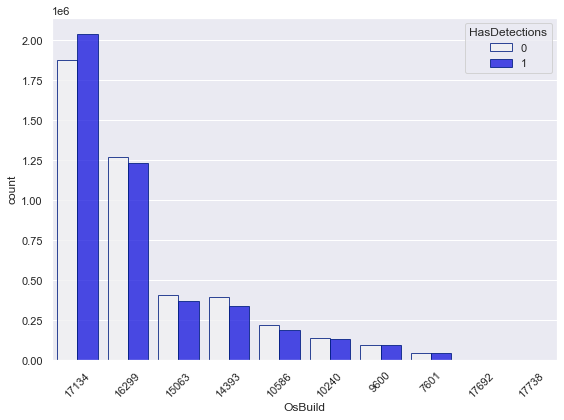

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OsBuild',
            hue='HasDetections',
            data=df,
            order=df['OsBuild'].value_counts().index[:10],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [86]:
np.mean(df['OsBuild'].astype('float') != df['Census_OSVersion_extracted'].astype('float'))*100

4.993522373759146

In [88]:
to_drop.append('Census_OSVersion_extracted')

In [89]:
df['OsBuild'].dtype

CategoricalDtype(categories=['10240', '10586', '14393', '15063', '16299', '17133',
                  '17134', '17604', '17618', '17623', '17627', '17634',
                  '17639', '17643', '17650', '17655', '17661', '17666',
                  '17672', '17677', '17682', '17686', '17689', '17692',
                  '17694', '17704', '17711', '17713', '17718', '17723',
                  '17725', '17728', '17730', '17733', '17734', '17735',
                  '17738', '17740', '17741', '17744', '17746', '17747',
                  '17749', '17750', '17751', '17752', '17753', '17754',
                  '17755', '17756', '17757', '17758', '17759', '17760',
                  '17761', '17763', '18201', '18204', '18214', '18219',
                  '18224', '18226', '18227', '18230', '18233', '18234',
                  '18236', '18237', '18238', '18240', '18241', '18242',
                  '18244', '7600', '7601', '9600'],
, ordered=False)

In [90]:
df['OsBuild'] = df['OsBuild'][df['OsBuild'].notnull()].astype('str')
df['OsBuild'].unique()

array(['17134', '14393', '16299', '7601', '9600', '10240', '15063',
       '10586', '17744', '17692', '17738', '17751', '17755', '17730',
       '17733', '17746', '17735', '17754', '17741', '17713', '17740',
       '17672', '17758', '17763', '7600', '17666', '17677', '17686',
       '17747', '17760', '17759', '17682', '17761', '17704', '17661',
       '17643', '18234', '17618', '18204', '17639', '17634', '17728',
       '18237', '18242', '17133', '17723', '17650', '17711', '18219',
       '18240', '17627', '17655', '18214', '18201', '17604', '18224',
       '18241', '17689', '17718', '17753', '18227', '18238', '17725',
       '17694', '17757', '18233', '17623', '17756', '17749', '17734',
       '17752', '18226', '18230', '18244', '18236', '17750'], dtype=object)

In [91]:
df['OsBuild'] = df['OsBuild'].astype('category')
df['OsBuild'].cat.add_categories('Other', inplace=True)
df.loc[(df['OsBuild'] != '17134') & 
       (df['OsBuild'] != '16299') &
       (df['OsBuild'] != '15063') &
       (df['OsBuild'] != '14393') &
       (df['OsBuild'] != '10586') &
       (df['OsBuild'] != '10240') &
       (df['OsBuild'] != '9600') &
       (df['OsBuild'] != '7601'),
       'OsBuild'] = 'Other'
df['OsBuild'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'OsBuild':'OsBuild_encoded'}, inplace=True)
df['OsBuild_encoded'].value_counts(normalize=True)

17134    0.438887
16299    0.280635
15063    0.087460
14393    0.081917
10586    0.046137
10240    0.030285
9600     0.021802
7601     0.010459
Other    0.002419
Name: OsBuild_encoded, dtype: float64

**OsSuite**

In [92]:
df['OsSuite'].isnull().sum()

0

In [93]:
os_suite = pd.concat([df['OsSuite'].value_counts(), 
                      df['OsSuite'].value_counts(normalize=True)*100], 
                      axis=1)
os_suite.columns=['Count', '%']
os_suite.head(10)

,Count,%
768,5560657,62.328876
256,3346250,37.507799
272,12092,0.135538
400,793,0.008889
16,731,0.008194
305,662,0.007420
784,198,0.002219
274,39,0.000437
144,34,0.000381
49,17,0.000191


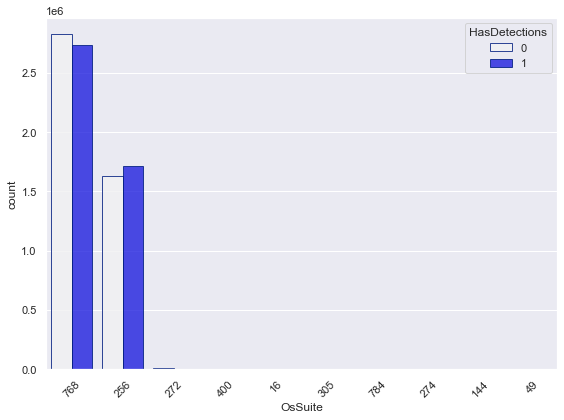

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OsSuite',
            hue='HasDetections',
            data=df,
            order=df['OsSuite'].value_counts().index[:10],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [96]:
df['OsSuite'].dtype

CategoricalDtype(categories=['144', '16', '18', '256', '272', '274', '305', '307', '400',
                  '402', '49', '528', '768', '784'],
, ordered=False)

In [97]:
df['OsSuite'] = df['OsSuite'][df['OsSuite'].notnull()].astype('str')
df['OsSuite'].unique()

array(['256', '768', '272', '16', '400', '784', '305', '274', '49', '144',
       '402', '528', '307', '18'], dtype=object)

In [98]:
df['OsSuite'] = df['OsSuite'].astype('category')
df['OsSuite'].cat.add_categories('Other', inplace=True)
df.loc[(df['OsSuite'] != '768') & 
       (df['OsSuite'] != '256'), 
       'OsSuite'] = 'Other'
df['OsSuite'].cat.remove_unused_categories(inplace=True)
df.rename(columns={'OsSuite':'OsSuite_encoded'}, inplace=True)
df['OsSuite_encoded'].value_counts(normalize=True)

768      0.623289
256      0.375078
Other    0.001633
Name: OsSuite_encoded, dtype: float64

**Census_OSBuildRevision**

In [99]:
census_os_build_rev = pd.concat([df['Census_OSBuildRevision'].value_counts(),
                                 df['Census_OSBuildRevision'].value_counts(normalize=True)*100],
                                 axis=1)
census_os_build_rev.columns=['Count', '%']
census_os_build_rev.head(30)


,Count,%
228,1413633,15.845278
165,899712,10.084786
431,546548,6.126205
285,470278,5.271301
547,346853,3.887842
112,346488,3.883751
371,325267,3.645887
191,228255,2.558489
2189,223774,2.508262
611,216776,2.429822


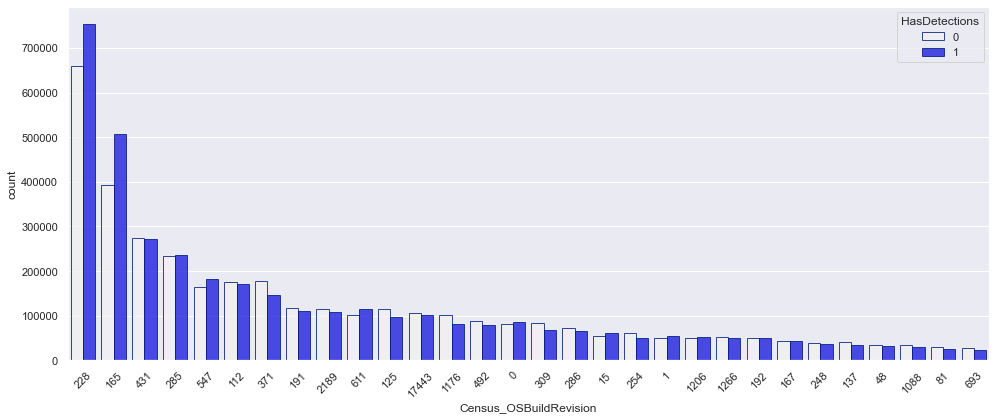

In [100]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Census_OSBuildRevision',
            hue='HasDetections',
            data=df,
            order=df['Census_OSBuildRevision'].value_counts().index[:30],
            color='blue',
            edgecolor=sns.color_palette('dark', 1),
            alpha=0.8)
plt.legend(loc=1, title='HasDetections')
plt.xticks(rotation = 45)
plt.tight_layout()

In [101]:
df['Census_OSBuildRevision'].dtype

CategoricalDtype(categories=['0', '1', '10', '1000', '1001', '1002', '1003', '1004',
                  '1005', '1007',
                  ...
                  '91', '916', '936', '953', '962', '966', '969', '970', '98',
                  '994'],
, ordered=False)

In [ ]:
# need to encode or treat as IDs

**Census_OSBranch_release_extracted**

In [102]:
census_os_release = pd.concat([df['Census_OSBranch_release_extracted'].value_counts(),
                               df['Census_OSBranch_release_extracted'].value_counts(normalize=True)*100],
                               axis=1)
census_os_release.columns=['Count', '%']
census_os_release.head(30)

,Count,%
rs4_release,3915504,43.888616
rs3_release_svc_escrow,1252730,14.041765
rs3_release,1194585,13.390021
rs2_release,780270,8.745993
rs1_release,535786,6.005589
th2_release_sec,280199,3.140731
th1,252031,2.824998
winblue_ltsb_escrow,136744,1.532754
th2_release,126857,1.421931
rs1_release_inmarket,107885,1.209276


In [103]:
df['Census_OSBranch_release_extracted'] = df['Census_OSBranch_release_extracted'].astype('object')
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs1', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'rs1_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs2', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'rs2_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs3', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'rs3_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs4', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'rs4_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs5', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'rs5_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('win', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'win'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('th2', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'th'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('th1', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'th'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs_pre', na=False, regex=False), 'Census_OSBranch_release_extracted'] = 'rs_prerelease'
df['Census_OSBranch_release_extracted'].value_counts(normalize=True)

rs4_release                  4.388862e-01
rs3_release                  2.806354e-01
rs2_release                  8.745993e-02
rs1_release                  8.191835e-02
th                           7.642216e-02
win                          3.232499e-02
rs5_release                  1.683021e-03
rs_prerelease                6.691732e-04
rs_xbox                      2.241786e-07
rs6_prerelease               1.120893e-07
rs_onecore_stack_per1        1.120893e-07
rs_shell                     1.120893e-07
rs_onecore_base_cobalt       1.120893e-07
rs_onecore_sigma_grfx_dev    1.120893e-07
Name: Census_OSBranch_release_extracted, dtype: float64

In [104]:
other_os_branch = ~df['Census_OSBranch_release_extracted'].isin(['rs4_release',
                                                                 'rs3_release',
                                                                 'rs2_release',
                                                                 'rs1_release',
                                                                 'th'
                                                                ])

In [105]:
df.loc[other_os_branch, 'Census_OSBranch_release_extracted'] = 'Other'
df.rename(columns={'Census_OSBranch_release_extracted':'Census_OSBranch_release_encoded'}, inplace=True)

In [106]:
df['Census_OSBranch_release_encoded'] = df['Census_OSBranch_release_encoded'].astype('category')
df['Census_OSBranch_release_encoded'].value_counts(normalize=True)

rs4_release    0.438885
rs3_release    0.280635
rs2_release    0.087460
rs1_release    0.081918
th             0.076422
Other          0.034680
Name: Census_OSBranch_release_encoded, dtype: float64

In [107]:
df['Census_OSBranch_release_encoded'].dtype

CategoricalDtype(categories=['Other', 'rs1_release', 'rs2_release', 'rs3_release',
                  'rs4_release', 'th'],
, ordered=False)

In [108]:
to_drop


['AvSigVersion',
 'Census_OSVersion',
 'AppVersion',
 'EngineVersion',
 'OsVer',
 'Census_OSVersion_extracted']

In [109]:
df = df.drop(to_drop, axis=1)

In [111]:
df.shape

(8921478, 71)

Let's generate some new features:

## Multivariate analysis

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [112]:
df.to_pickle('../data/interim/train_clean_roll_up.pickle')